# Homework 3: Optimization in Neural Network

In this assignment, you will design and implement a deep neural network (DNN) to solve a binary classification problem. This task involves building a flexible DNN architecture where both the width (number of neurons per layer) and depth (number of layers) can be customized. Additionally, you will implement and test various advanced optimization algorithms to understand how they impact the training process and model performance, such as
- Momentum,
- RMSProp,
- Adam,




# 0 - Packages
Let's first import necessary libraries
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
tools for data mining and data analysis.
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1) # set a seed so that the results are consistent

# 1 - Build up Deep Neural Network

## 1.1 - Initialization

We will initialize the parameters of a DNN using a given `layer_dims` array, which specifies the size of each layer, including the input size `n_x` and output size `n_y`. As to deal with **symmetric patterns**, we use random initialization for weights and zero initialization for biases.

Given a weigh matrix $W^{\ell}\in \mathbb{R}^{n^{\ell}\times n^{\ell-1}}$, each entry is randomly initialized using an i.i.d. Gaussian distribution:
$$
W^{\ell}_{ij}\sim \mathcal{N}(0,1/n^{\ell-1})
$$

**Exercise 1**:
1. The method `initialize_dnn_parameters` takes `layer_dims` array as input
2. Loop through the array using `stdv * np.random.randn(a.b) + mu` to random initialize weights `parameters['W' + str(l)]` and using `np.zeros((a,1))` to initialize bias `parameters['b' + str(1)]`
3. Return `parameters` as a dictionary containing all weights and biases.

In [ ]:
# Initialize weights and biases
def initialize_dnn_parameters(layer_dims):
    L = len(layer_dims) # number of layers
    parameters = {}
    for l in range(1, L):
        ### Code star here ### (~ 1 lines of code)

        ### Code star here ### (~ 1 lines of code)
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    return parameters

In [ ]:
# Test initialization
np.random.seed(1)
n_x = 5
n_h = 4
n_y = 3
layer_dims = [n_x, n_h, n_y]
parameters = initialize_dnn_parameters(layer_dims)
for l in range(1, len(layer_dims)):
    print(f"W{l} = \n{parameters['W' + str(l)]}")
    print(f"b{l} = \n{parameters['b' + str(l)]}")

W1 = 
[[ 0.72642933 -0.27358579 -0.23620559 -0.47984616  0.38702206]
 [-1.0292794   0.78030354 -0.34042208  0.14267862 -0.11152182]
 [ 0.65387455 -0.92132293 -0.14418936 -0.17175433  0.50703711]
 [-0.49188633 -0.07711224 -0.39259022  0.01887856  0.26064289]]
b1 = 
[[0.]
 [0.]
 [0.]
 [0.]]
W2 = 
[[-0.55030959  0.57236185  0.45079536  0.25124717]
 [ 0.45042797 -0.34186393 -0.06144511 -0.46788472]
 [-0.13394404  0.26517773 -0.34583038 -0.19837676]]
b2 = 
[[0.]
 [0.]
 [0.]]


## 1.2 - Activation Functions and Its Derivatives
In the preivous assignment, we implemented sigmoid activaiton function. In this assignment, we will focus on ReLU activaiton:
$$
f(x) = \max\{0,x\}
$$
and its derivative is given by
$$
f^{\prime}(x) =
\begin{cases}
1, & x\geq 0\\
0, & x < 0
\end{cases}
$$


**Exercise 2**:
1. We will implement activaiton function in a `class` form that includes both evaluation in `forward()` and `derivative()`
1. Implement `forward()` method for ReLU function `class` so `forward()` is automatically evaluted when ReLU is called.
2. Implement its `derivative` to compute the gradient during backpropagation.

In [ ]:
# Define Sigmoid activation function class
class Sigmoid:
    def __init__(self):
        pass

    def forward(self, x):
        return 1 / (1 + np.exp(-x))

    def derivative(self, x):
        return self.forward(x) * (1 - self.forward(x))

    def __call__(self, x):
        return self.forward(x)

# Define ReLU activation function class
class ReLU:
    def __init__(self):
        pass

    def forward(self, x):
        ### Code star here ### (~ 1 lines of code)

        ### Code star here ### (~ 1 lines of code)

    def derivative(self, x):
        ### Code star here ### (~ 1 lines of code)

        ### Code star here ### (~ 1 lines of code)

    def __call__(self, x):
        return self.forward(x)


In [ ]:
# Test the forward and backward (derivative) of ReLU activaiton
np.random.seed(1)
x = np.random.randn(10)
print(f"x = \n{x}")
print(f"ReLU(x) = \n{ReLU()(x)}")
print(f"ReLU'(x) = \n{ReLU().derivative(x)}")

x = 
[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038]
ReLU(x) = 
[1.62434536 0.         0.         0.         0.86540763 0.
 1.74481176 0.         0.3190391  0.        ]
ReLU'(x) = 
[1 0 0 0 1 0 1 0 1 0]


## 1.3 - Forward Propogation
With $A^{0}=X$ and $\hat{Y}=A^{L}$, the forward propagation becomes
$$
\begin{align*}
  &Z^{\ell} = W^{\ell} A^{\ell-1} + b^{\ell},&\forall \ell\in [L]\\
  &A^{\ell} =\phi(Z^{\ell}), & \forall \ell\in [L]
\end{align*}
$$
**Exercies 3**:
1. Implement a `layer` of DNN that take previous output `A_prev`, weights `W`, bias `b`, and activaiton `act` as input
2. The `layer` should perform a linear transform followed by a nonlinear activaiton
3. Return both the pre-activaiton `Z` and the activation `A`

In [ ]:
def layer(A_prev, W, b, act=ReLU()):
  ### Code star here ### (~ 1 lines of code)

  ### Code star here ### (~ 1 lines of code)
  A = act(Z)
  return A, Z

In [ ]:
# Testing the nonlinear layer
np.random.seed(1)
num_samples = 5
X = np.random.randn(n_x, num_samples)
Y = np.random.randn(n_y, num_samples)

A_prev = X
W1 = parameters['W1']
b1 = parameters['b1']
A1, Z1 = layer(A_prev, W1, b1)
print(f"Z1 = \n{Z1}")
print(f"A1 = \n{A1}")

Z1 = 
[[ 1.56609702  0.09063559  0.67090516 -0.60178437  0.49806848]
 [-3.99972574  2.54020495 -0.16637687  1.43405633 -1.4886008 ]
 [ 2.60261439 -1.10046399  1.01036437 -0.69261547  0.98880754]
 [-1.50315868  1.27026826  0.66349718  0.78572127 -0.60575506]]
A1 = 
[[1.56609702 0.09063559 0.67090516 0.         0.49806848]
 [0.         2.54020495 0.         1.43405633 0.        ]
 [2.60261439 0.         1.01036437 0.         0.98880754]
 [0.         1.27026826 0.66349718 0.78572127 0.        ]]


Recall the forward propagation:
$$
        \begin{align*}
            &Z^{\ell} = W^{\ell} A^{\ell-1} + b^{\ell},&\forall \ell\in [L]\\
            &A^{\ell}
            =\phi(Z^{\ell}), & \forall \ell\in [L]
        \end{align*}
$$
Using the `layer` function, DNNs can be built by staking `layer`:

`layer_1 -> layer_2 -> ... -> layer_L`

**Exercise 4**:
In this exercise, you will stack multiple `layer` operations to build a DNN by implementing the `forward_propagation()` function.

 1. The function `forward_propagation()` takes `X`, `parameters`, and `act` as inputs
 2. Calculate the number of layers `L=len(parameters)//2`, since each layer has two parameters: weights and biases
 3. For each layer, retrieve the weights and biases from parameters and apply the `layer()` function to propagate forward.
 4. Store intermediate variables `Zl` and `Al` in `cache` for later use in backpropagation.
 5. At the end, return the final output `AL` and the `cache`


In [ ]:
def forward_propagation(X, parameters, act=ReLU()):
  L = len(parameters) // 2 # num of layers
  A = X # Initialize A0 with X
  caches = {}
  caches['A0'] = A # Cache the initial activaiton

  for l in range(1, L+1): # including the output layer
    A_prev = A
    W = parameters['W' + str(l)]
    b = parameters['b' + str(l)]
    ### Code star here ### (~ 1 lines of code)

    ### Code star here ### (~ 1 lines of code)
    caches['Z' + str(l)] = Z
    caches['A' + str(l)] = A

  return A, caches

In [ ]:
# Test forward propagation
np.random.seed(1)
A, caches = forward_propagation(X, parameters, act=ReLU())

L = len(parameters) // 2
for l in range(1, L+1):
    print(f"Z{l} = \n{caches['Z' + str(l)]}")

Z1 = 
[[ 1.56609702  0.09063559  0.67090516 -0.60178437  0.49806848]
 [-3.99972574  2.54020495 -0.16637687  1.43405633 -1.4886008 ]
 [ 2.60261439 -1.10046399  1.01036437 -0.69261547  0.98880754]
 [-1.50315868  1.27026826  0.66349718  0.78572127 -0.60575506]]
Z2 = 
[[ 0.31140829  1.72319009  0.25296382  1.01820938  0.17165799]
 [ 0.54549597 -1.42191875 -0.07032769 -0.85787911  0.16358659]
 [-1.10983247  0.40947399 -0.57090086  0.22441096 -0.40867299]]


## 1.4 - Compute the Cost

With the output estimate `AL` from forward propagation, we compute the cost using the square loss:
$$
L(\theta)=\frac{1}{2m} \sum_{i=1}^{m} (a^{L}_i-y_i)^2 = \frac{1}{2m}\|A^{L}-Y\|^2
$$
The `compute_cost()` method is implemented in the previous programming assignment and it is copyed here.

In [ ]:
def compute_cost(A, Y):
    m = Y.shape[1]
    cost = np.sum((A - Y) ** 2) / (2 * m)
    return cost

In [ ]:
# Test the cost
print(f"cost = {compute_cost(A, Y)}")

cost = 1.6162759475496054


## 1.5 - Backpropagation
Using the `cache` computed during the `forward_propogation()`, we can compute the gradients using backpropogation.

The gradient of the cost with respect to $Z^{L}$ is given by:
$$d Z^{L} = \frac{1}{m}( A^{L} -  Y) \odot \phi^{\prime}(Z^{L}),$$
Backpropagation for the gradients is then given by
$$
\begin{align*}
    &d W^{\ell} = d Z^{\ell}  * A^{(\ell-1) \top},&&\forall \ell\in [L]\\
    &d b^{\ell} = d Z^{\ell} * e,&&\forall \ell\in [L]\\
    &d Z^{\ell-1} =\phi^{\prime}( Z^{\ell-1}) \odot \left[ W^{(\ell)\top} d Z^{\ell}\right], &&\forall \ell\in [2,3, ..., L]\\
\end{align*}
$$
Note that because we don't have $dZ^{0}$, so the backpropogate does not pass $dZ^{\ell-1}$ for the first layer, when $\ell=1$.

**Exercise 4:** Implement `back_propogation()`
1. The function `back_propogation()` takes data `Y`, `parameters`, `caches`, and `act_derivative` as inputs
2. For each hidden layer, retrieve weights and biases from `parameters`, and intermediate variables `Zl` and `Al` from `caches`
3. Compute the gradients `dWl`, `dbl`, using the formulas provided.
4. Return the gradients in a variable `grads`


In [ ]:
def back_propagation(Y, parameters, caches, act_derivative=ReLU().derivative):
    L = len(parameters) // 2 # num of layers in DNN
    m = Y.shape[1]           # num of training samples
    grads = {}

    ZL = caches['Z' + str(L)]
    AL = caches['A' + str(L)]
    dZ = (AL - Y) / m * act_derivative(ZL)  # Derivative of loss w.r.t. ZL

    for l in reversed(range(1, L+1)):
        # Compute the gradients using dZ and A_prev
        A_prev = caches['A' + str(l-1)]
        ### Code star here ### (~ 1 lines of code)


        ### Code star here ### (~ 1 lines of code)

        # Store the computed gradients
        grads['dW' + str(l)] = dW
        grads['db' + str(l)] = db

        # Backpropogate dZ
        W = parameters['W' + str(l)]
        if l > 1:
            Z_prev = caches['Z' + str(l - 1)]
            dZ = W.T @ dZ * act_derivative(Z_prev)

    return grads

In [ ]:
# Test the backpropagation()
grads = back_propagation(Y, parameters, caches, act_derivative=ReLU().derivative)
L = len(parameters) // 2
for l in range(1, L+1):
    print(f"dW{l} = \n{grads['dW' + str(l)]}")
    print(f"db{l} = \n{grads['db' + str(l)]}")


dW1 = 
[[ 0.32079668 -0.35931439  0.67786929  0.22166572 -0.29616953]
 [-0.25509944  0.53268915 -0.62948182 -0.04739938  0.3703269 ]
 [ 0.02756907 -0.24246346  0.02609939 -0.20087267 -0.02376255]
 [-0.18168758  0.04948135 -0.13226396 -0.05285537  0.15179305]]
db1 = 
[[-0.25830939]
 [ 0.3633949 ]
 [ 0.13909308]
 [ 0.21349728]]
dW2 = 
[[0.46893434 1.30675172 0.68726532 0.82885051]
 [0.47066226 0.         0.80906616 0.        ]
 [0.0276762  0.36398266 0.         0.16232166]]
db2 = 
[[0.99146994]
 [0.41439789]
 [0.01827862]]


## 1.6 - Define Deep Neural Networks
As we have implemented `initialize_dnn_parameters()`, `forward_propagation()`, and `back_propogation()`, we will combine everthing and define the `NeuralNetork()` class.

**Exercise 5**:
1. To define the `NeuralNetwork` class, we will take input size `n_x`, output size `n_y`, and width `n_h`, the depth `depth`, and activaiton function `act` as inputs.
2. Store these hyperparameters `n_x`, `n_y`, `n_h`, `depth`, `act` as attributes of the class
3. Next, we `initialize()` DNN by using `initialize_dnn_parameters()` to randomly initialze the network's `self.parameters`
4. When the DNN is called, it will automcatically run `forward()` using the `forward_propogation()` method, and store the intermediate pre-activatios and activaitons along in `self.caches`.
5. The DNN also implements a `backward()` method using `back_propogation()` to compute the `grads` and store them into `self.grads` for use in training

**Note**: for simplicity, we assume each hidden layer has the same width `n_h`, but in pratice it can vary based on the learning task

In [ ]:
# Define the Neural Network class
class NeuralNetwork:
    def __init__(self, n_x, n_y, n_h, depth, act=ReLU()):
        self.n_x = n_x
        self.n_y = n_y
        self.n_h = n_h
        self.depth = depth
        self.act = act
        self.initialize()

    def initialize(self):
        layer_dims = [self.n_x] + [self.n_h] * (self.depth-1) + [self.n_y]
        ### Code star here ### (~ 1 lines of code)

        ### Code star here ### (~ 1 lines of code)

    def forward(self, X):
        self.caches = {}
        output, caches = forward_propagation(X, self.parameters, self.act)
        self.caches = caches
        return output

    def backward(self, Y):
        self.grads = {}
        ### Code star here ### (~ 1 lines of code)

        ### Code star here ### (~ 1 lines of code)
        self.grads = grads

    def __call__(self, X):
        return self.forward(X)

In [ ]:
# Test NeuralNetwork and its forward()
np.random.seed(1)
network = NeuralNetwork(n_x, n_y, n_h, depth=3, act=Sigmoid())
# for l in range(1, network.depth+1):
#     print(f"W{l} = \n{network.parameters['W' + str(l)]}")
#     print(f"b{l} = \n{network.parameters['b' + str(l)]}")

A = network(X)
print(f"Shape of A: {A.shape}")
print(f"A = \n{A}")

Shape of A: (3, 5)
A = 
[[0.55831189 0.55443928 0.54659092 0.55392421 0.55795259]
 [0.46492619 0.46885814 0.46908606 0.47288036 0.47080043]
 [0.56056543 0.57371092 0.5664458  0.57830504 0.56963568]]


In [ ]:
# Test the backward() method in NeuralNetwork
network.backward(Y)

for l in range(1, network.depth+1):
    print(f"dW{l} = \n{network.grads['dW' + str(l)]}")
    print(f"db{l} = \n{network.grads['db' + str(l)]}")

dW1 = 
[[-2.45295133e-04 -2.25631192e-03  4.35702270e-03  1.99810683e-03
  -4.31453192e-03]
 [ 1.74616794e-03  1.09657775e-03  1.64845768e-03  2.26170467e-03
  -3.95536575e-03]
 [ 2.40107276e-03 -2.75028082e-04  4.81151287e-03  3.80185081e-03
  -5.35883774e-03]
 [ 7.00680826e-04  1.13274821e-03  8.70416355e-05  9.59219266e-04
   6.51037193e-04]]
db1 = 
[[-0.00584987]
 [-0.00493451]
 [-0.00775901]
 [ 0.00019978]]
dW2 = 
[[-0.02138321 -0.01563463 -0.02190386 -0.01819914]
 [-0.01848074 -0.01425269 -0.0174441  -0.01575171]
 [ 0.01262397  0.00912104  0.01222542  0.01067572]
 [ 0.05583385  0.0427841   0.05231047  0.04745386]]
db2 = 
[[-0.03421779]
 [-0.02948561]
 [ 0.01837943]
 [ 0.08720356]]
dW3 = 
[[0.12294288 0.09624135 0.09018338 0.07296832]
 [0.16412092 0.12840136 0.1217467  0.09905904]
 [0.03794299 0.03028092 0.02890415 0.02161135]]
db3 = 
[[0.21017079]
 [0.28086741]
 [0.06606098]]


In [ ]:
Y.shape

(3, 5)

# 2 - Optimization Algorithms

In this section, we will implement several optimization algorithms that improve the efficiency and effectiveness of training deep neural networks. Using the `class`-based approach, we will define various optimizers, such as Gradient Descent, Momentum, RMSProp, and Adam, which will be used to update the network’s weights. Each optimizer class will encapsulate the update rules specific to the algorithm, allowing for flexible and modular integration with the neural network during training.

## 2.1 - Gradient Descent

Gradient descents are performed using the following rule:
$$
\theta \leftarrow \theta - \eta d\theta
$$
where $\eta>0$ is the learning rate.

**Exercise 6**: Implemente `gradient_descent_step()`
1. The function takes `parameters`, `grads`,  and `learning_rate` as inputs
2. For each layer, it retrive weights and biases from `parameters`, gradients from `grads`
3. Update the weights and biases using the gradient descent rule.
4. Store the updated weights and biases back into `parameters`

In [ ]:
def gradient_descent_step(parameters, grads, learning_rate):
    L = len(parameters) // 2
    for l in range(1, L+1):
      W, b = parameters['W' + str(l)], parameters['b' + str(l)]
      dW, db = grads['dW' + str(l)], grads['db' + str(l)]

      ### Code star here ### (~ 1 lines of code)


      parameters['W' + str(l)] = W
      parameters['b' + str(l)] = b

In [ ]:
gradient_descent_step(network.parameters, network.grads, learning_rate=0.01)

for l in range(1, network.depth+1):
    print(f"W{l} = \n{network.parameters['W' + str(l)]}")
    print(f"b{l} = \n{network.parameters['b' + str(l)]}")

W1 = 
[[ 0.72643178 -0.27356322 -0.23624916 -0.47986614  0.3870652 ]
 [-1.02929686  0.78029258 -0.34043856  0.142656   -0.11148227]
 [ 0.65385054 -0.92132018 -0.14423747 -0.17179235  0.5070907 ]
 [-0.49189334 -0.07712357 -0.39259109  0.01886897  0.26063638]]
b1 = 
[[ 5.84987464e-05]
 [ 4.93450796e-05]
 [ 7.75900847e-05]
 [-1.99777875e-06]]
W2 = 
[[-0.55009576  0.5725182   0.4510144   0.25142916]
 [ 0.45061278 -0.3417214  -0.06127067 -0.4677272 ]
 [-0.13407028  0.26508652 -0.34595263 -0.19848352]
 [-0.34414469 -0.42303066 -0.33614617 -0.00680684]]
b2 = 
[[ 0.00034218]
 [ 0.00029486]
 [-0.00018379]
 [-0.00087204]]
W3 = 
[[-0.5598846   0.11624544  0.82899925  0.3702924 ]
 [-0.09755899 -0.4450985  -0.37479661  0.84523671]
 [ 0.02502445 -0.31880063  0.0951687   1.04991145]]
b3 = 
[[-0.00210171]
 [-0.00280867]
 [-0.00066061]]


Next, we can testify the `gradient_descent_step` by creating a training `for` loop that applies `gradient_descent_step()` iteratively to update the `network.parameters` over multiple iterations.

In [ ]:
learning_rate = 0.1
max_iter = 10
losses = []
for i in range(max_iter):
    A = network(X)
    losses.append(compute_cost(A, Y))
    network.backward(Y)
    gradient_descent_step(network.parameters, network.grads, learning_rate)

losses = np.array(losses)
print(f"Losses: \n{losses}")

Losses: 
[1.58122401 1.55545223 1.53042675 1.50617107 1.48270124 1.46002644
 1.43814964 1.41706841 1.39677552 1.37725973]


## 2.2 - Gradient Descent with Momentum


Gradient descent with momentum follows the update rule:
$$
\begin{align}
v^{+} =& \beta v + (1-\beta) \nabla L(v)\\
w^{+} =& w - \eta v^{+}
\end{align}
$$
where $\beta$ is the momentum factor and $\eta$ is the learning rate.

It’s important to note that we cannot simply implement `gradient_descent_with_momentum_step()` by passing the `network.parameters` and `network.grads`. That is because the momentum-based method rely on the **historical** information, which must be stored across iterations. This requirement also applies to methods like **RMSProp** and **Adam**. Therefore, we create an `Optimizer()` class, which includes internal variables to store the necessary historical data and can be extended to other optimizers.

**Steps**:
1. The `Optimizer` class takes an neural network `network` and `learning_rate` as inputs for initialization
2. It should store the network `network` and `learning_rate` as internal variables
3. It also have a method called `step()` that applies different optimizer step

In [ ]:
class Optimizer:
    def __init__(self, network, learning_rate):
        self.network = network  # The entire neural network is passed in
        self.learning_rate = learning_rate

    def step(self):
        raise NotImplementedError("Step method must be implemented in a subclass")

By using this basic class `Optimizer`, we can extend it to other optimizers by overriding the `step()` method. Let us take implement `GradientDescent` as an example.

**Exercies 7**:
1. Inherit `GradientDescent` from `Optimizer` class by using `class GradientDescent(Optimizer)`
2. Since `GradientDescent` requires no additional inputs, we can omite the `__init__()` method
3. Implement the `step()` using the `gradient_descent_step()` function.

In [ ]:
class GradientDescent(Optimizer):
    # No need to redefine __init__() because it uses the same as Optimizer

    def step(self):
        ### Code star here ### (~ 1 lines of code)

        ### Code star here ### (~ 1 lines of code)

In [ ]:
# Test the `GradientDescent` optimizer by using the previous training loop
optimizer = GradientDescent(network, learning_rate = 0.1)

max_iter = 10
losses = []
for i in range(max_iter):
    A = network(X)
    losses.append(compute_cost(A, Y))
    network.backward(Y)
    optimizer.step()

losses = np.array(losses)
print(f"Losses: \n{losses}")

Losses: 
[1.35850643 1.34049822 1.32321553 1.30663707 1.29074031 1.27550183
 1.2608977  1.24690371 1.23349564 1.22064944]


Recall the Gradient descent with momentum update rule:
$$
\begin{align}
v^{+} =& \beta v + (1-\beta) \nabla L(v)\\
w^{+} =& w - \eta v^{+}
\end{align}
$$
where $\beta$ is the momentum factor and $\eta$ is the learning rate.

Using the same strategy, we can implement the `GradientDescentWithMomentum` optimizer.

**Exercise 8**
1. Unlike plain gradient descent, `GradientDescentWithMomentum` requires an additional input: the momentum factor `beta`. So, we will redefine the `__init__()` method to include it. Additionally, we will define a new internal variable `self.velocities` to store the previous search directions
2. Implement the `step()` method by using GD with momentum formula

In [ ]:
class GradientDescentWithMomentum(Optimizer):
    def __init__(self, network, learning_rate, beta=0.9):
        super().__init__(network, learning_rate)
        self.beta = beta
        self.velocities = {}

    def step(self):
        for key in self.network.parameters.keys():
            # Get corresponding gradient key: W1 -> dW1, b1 -> db1
            grad_key = 'd' + key

            # Get the parameter value and gradient value
            param = self.network.parameters[key]
            grad = self.network.grads[grad_key]

            # Initialize velocity if not present
            if key not in self.velocities:
                self.velocities[key] = np.zeros_like(param)

            # Get the previous velocity for this parameter
            velocity = self.velocities[key]

            # Update the velocity and parameter using the momentum formula
            ### Code star here ### (~ 2 lines of code)


            ### Code star here ### (~ 2 lines of code)

            # Store the updated velocity and parameter back into the neural network
            self.velocities[key] = velocity
            self.network.parameters[key] = param


In [ ]:
optimizer = GradientDescentWithMomentum(network, learning_rate = 0.1, beta=0.8)

max_iter = 10
losses = []
for i in range(max_iter):
    A = network(X)
    losses.append(compute_cost(A, Y))
    network.backward(Y)
    optimizer.step()

losses = np.array(losses)
print(f"Losses: \n{losses}")

Losses: 
[1.20834141 1.20596265 1.20171618 1.19603373 1.18927433 1.18173282
 1.17364854 1.16521379 1.15658144 1.14787174]


## 2.3 - RMSProp

As introduced in the lectures, we can also scale the gradient coordinates to obtain faster convergence. One of the commonly used method is `RMSProp`. The update rule is given by

$$
\begin{align}
s^{+} =& \beta s + (1-\beta) g^2\\
w^{+} =& w - \eta g/ \sqrt{s^{+}}
\end{align}
$$
where $\beta$ is the scaling factor.


Using the same strategy we can implement the `RMSProp` optimizer.

**Exercise 9**
1. Like `GradientDescentWithMomentum` requires an additional input, the `RMSProp` also require a scaling factor `beta`, so we also need to redefine the `__init__()` method. Similarly, we will define extra variable `self.squared_gradients` for scaling
2. Implement the `step()` method by using RMSProp formula

In [ ]:
class RMSProp(Optimizer):
    def __init__(self, network, learning_rate, beta=0.9):
        super().__init__(network, learning_rate)
        self.beta = beta
        self.squared_gradients = {}

    def step(self):
        for key in self.network.parameters.keys():
            # Get corresponding gradient key: W1 -> dW1, b1 -> db1
            grad_key = 'd' + key

            # Get the parameter value and gradient value
            param = self.network.parameters[key]
            grad = self.network.grads[grad_key]

            # Initialize running average of squared gradients if not present
            if key not in self.squared_gradients:
                self.squared_gradients[key] = np.zeros_like(param)

            # Get the previous squared_gradient for this parameter
            squared_gradient = self.squared_gradients[key]

            # Update the squared_gradient and parameter using the RMSProp formula
            ### Code star here ### (~ 2 lines of code)


            ### Code star here ### (~ 2 lines of code)

            # Store the updated parameter back into the neural network
            self.squared_gradients[key] = squared_gradient
            self.network.parameters[key] = param



In [ ]:
# Test RMSProp
optimizer = RMSProp(network, learning_rate = 0.1, beta=0.8)

max_iter = 10
losses = []
for i in range(max_iter):
    A = network(X)
    losses.append(compute_cost(A, Y))
    network.backward(Y)
    optimizer.step()

losses = np.array(losses)
print(f"Losses: \n{losses}")

Losses: 
[1.13917813 0.93771112 0.88441321 0.85816113 0.84225874 0.83031255
 0.81918576 0.80685137 0.7920086  0.77447806]


## 2.4 -  Adam

Using the same strategy we can implement the `Adam` optimizer. The update rules for `Adam` are:
$$
\begin{align}
v^+ = & \beta_1 v + (1-\beta_1) g\\
s^{+} =& \beta_2 s + (1-\beta_2) g^2\\
w^{+} =& w - \eta v^+/ \sqrt{s^{+}}
\end{align}
$$
where $\beta_1$ and $\beta_2$ are momentum and scaling factors, respectively

**Exercise 10**
1. The `Adam` optimizer requires two factors `beta1` and `beta2`, so we also need to redefine the `__init__()` method
2. Implement the `step()` method using Adam formula

In [ ]:
class Adam(Optimizer):
    def __init__(self, network, learning_rate, beta1=0.9, beta2=0.999):
        super().__init__(network, learning_rate)
        self.beta1 = beta1
        self.beta2 = beta2
        self.velocities = {}
        self.squared_gradients = {}

    def step(self):
        for key in self.network.parameters.keys():
            # Get corresponding gradient key: W1 -> dW1, b1 -> db1
            grad_key = 'd' + key

            # Get the parameter value and gradient value
            param = self.network.parameters[key]
            grad = self.network.grads[grad_key]

            # Initialize velocity and running average of squared gradients if not present
            if key not in self.velocities:
              self.velocities[key] = np.zeros_like(param)

            if key not in self.squared_gradients:
              self.squared_gradients[key] = np.zeros_like(param)

            # Get the previous velocity and squared_gradient for this parameter
            velocity = self.velocities[key]
            squared_gradient = self.squared_gradients[key]

            # Update the velocity, squared_gradient, and parameters using the RMSProp formula
            ### Code star here ### (~ 3 lines of code)


            ### Code star here ### (~ 3 lines of code)

            # Store the updated parameter back into the neural network
            self.velocities[key] = velocity
            self.squared_gradients[key] = squared_gradient
            self.network.parameters[key] = param


In [ ]:
# Test the Adam optimizer using the training loop
optimizer = Adam(network, learning_rate = 0.1, beta1=0.8, beta2=0.9)

max_iter = 10
losses = []
for i in range(max_iter):
    A = network(X)
    losses.append(compute_cost(A, Y))
    network.backward(Y)
    optimizer.step()

losses = np.array(losses)
print(f"Losses: \n{losses}")

Losses: 
[0.75553165 0.74249309 0.72800963 0.71133007 0.69410869 0.6767335
 0.65942181 0.64324815 0.62884124 0.61665247]


# 3 - Training with Optimizers

We will build a general `train()` function that takes a `model`, an `optimizer`, along with `X_train`, `Y_train`, `X_test`, `Y_test`, and returns the `train_losses` and `test_losses`. We can then plot the losses to observe the convergence behavior and test performance.

To improve code efficiency, we will create a `train_loop()` function that takes `model`, `optimizer`, `X`, `Y`, and a boolean flag `evaluate`.

- If `evaluate=False`, the `train_loop()` performs a training step: the model runs `backward()` to compute gradients and `optimizer.step()` to update the parameters.
- If `evaluate=True`, the `train_loop()` evaluates the model on `X` and `Y` without performing backpropagation or updating the parameters.


In [ ]:
def train_loop(model, optimizer, X, Y, evaluate=False):
    outputs = model(X)
    loss = compute_cost(outputs, Y)
    if not evaluate:
        model.backward(Y)
        optimizer.step()

    return loss

In [ ]:
def train(model, optimizer, X_train, Y_train, X_test, Y_test, num_iterations=10, print_cost=False):
    train_losses = []
    test_losses = []

    for i in range(num_iterations):
        # Perform training and evaluation every iteration
        test_loss = train_loop(model, optimizer, X_test, Y_test, evaluate=True)
        train_loss = train_loop(model, optimizer, X_train, Y_train, evaluate=False)

        # Store both train and test losses
        train_losses.append(train_loss)
        test_losses.append(test_loss)

        # Optionally print the loss values
        if print_cost and i % 10 == 0:
            print(f"Train Loss at {i}: {train_loss}; Test Loss at {i}: {test_loss}")

    return np.array(train_losses), np.array(test_losses)

In [ ]:
network = NeuralNetwork(n_x, n_y, n_h, depth=3)
optimizer = Adam(network, learning_rate = 0.1, beta1=0.8, beta2=0.9)
train_losses, test_losses = train(network, optimizer, X, Y, X, Y, num_iterations=10)
print(f"Train Losses: \n{train_losses}")
print(f"Test Losses: \n{test_losses}")

Train Losses: 
[1.02714325 0.86439796 0.81946337 0.81498499 0.81420463 0.81582066
 0.76843499 0.73609406 0.73458765 0.71423812]
Test Losses: 
[1.02714325 0.86439796 0.81946337 0.81498499 0.81420463 0.81582066
 0.76843499 0.73609406 0.73458765 0.71423812]


## 3.1 - Load Image Dataset: MNIST

Let us test your DNN model on the MNIST dataset, which contains images of digits `0` through `9`. For simplicity, we will select only the digits `0` and `1` for binary classification.

In [ ]:
import tensorflow as tf
import numpy as np

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten the 28x28 images into vectors of 784 elements and normalize to [0, 1]
X_train = X_train.reshape(X_train.shape[0], -1).T / 255.0  # Transpose to (in_features, num_samples)
X_test = X_test.reshape(X_test.shape[0], -1).T / 255.0     # Transpose to (in_features, num_samples)

# Select only the samples of class '0' and '1' for binary classification
train_filter = (y_train == 0) | (y_train == 1)
test_filter = (y_test == 0) | (y_test == 1)

X_train_binary = X_train[:, train_filter]
y_train_binary = y_train[train_filter].reshape(1, -1)  # Reshape to (1, num_samples)

X_test_binary = X_test[:, test_filter]
y_test_binary = y_test[test_filter].reshape(1, -1)  # Reshape to (1, num_samples)

# Verify the shapes
print(f"Training data shape: {X_train_binary.shape}")  # Should be (784, num_samples)
print(f"Training labels shape: {y_train_binary.shape}")  # Should be (1, num_samples)
print(f"Testing data shape: {X_test_binary.shape}")  # Should be (784, num_samples)
print(f"Testing labels shape: {y_test_binary.shape}")  # Should be (1, num_samples)

# Print out some example labels to verify
print("Training labels:", np.unique(y_train_binary))
print("Testing labels:", np.unique(y_test_binary))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (784, 12665)
Training labels shape: (1, 12665)
Testing data shape: (784, 2115)
Testing labels shape: (1, 2115)
Training labels: [0 1]
Testing labels: [0 1]


## 3.2 Optimizer Comparison

In this exercise, we will test different optimization algorithms on a simple neural network trained for binary classification using the MNIST dataset (with digits ‘0’ and ‘1’). The code initializes a neural network with a specified number of input neurons, hidden neurons, output neurons, and depth.

We then experiment with different optimization algorithms, including Gradient Descent and Momentum, to observe their effects on the model’s performance. The code runs each optimizer for a specified number of iterations and records the training and test losses.

The results are plotted to compare how each optimizer influences the convergence of the model. This will help you understand the differences in performance between the optimizers and how they affect the model’s ability to generalize to new data.

Training with Gradient Descent ...
Train Losses: 0.0033, Test Losses: 0.0029
Training with Adam ...
Train Losses: 0.0011, Test Losses: 0.0014


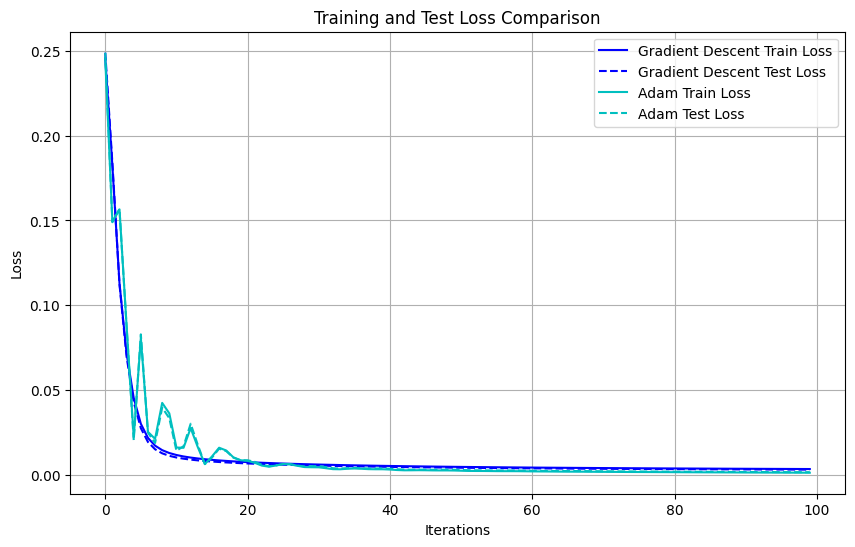

In [ ]:
# Initialize neural network and optimizer settings
input_size = X_train_binary.shape[0]
hidden_size = 64
output_size = 1
depth = 3
num_iterations = 100

# Dictionary of optimizers and their settings
optimizers = {
    "Gradient Descent": lambda net: GradientDescent(net, learning_rate=0.1),
    # "Momentum": lambda net: GradientDescentWithMomentum(net, learning_rate=0.9, beta=0.9),
    # "RMSProp": lambda net: RMSProp(net, learning_rate=0.001, beta=0.9),
    "Adam": lambda net: Adam(net, learning_rate=0.01, beta1=0.9, beta2=0.99)
}

# Define colors for each optimizer
colors = {
    "Gradient Descent": 'b',
    # "Momentum": 'k',
    # "RMSProp": 'r',
    "Adam": 'c'
}

# Dictionary to store losses for each optimizer
train_losses_dict = {}
test_losses_dict = {}

# Loop through each optimizer, reinitialize the network, and train
for opt_name, optimizer_fn in optimizers.items():
    print(f"Training with {opt_name} ...")
    np.random.seed(1)
    mnist_net = NeuralNetwork(input_size, output_size, hidden_size, depth)
    optimizer = optimizer_fn(mnist_net)
    train_losses, test_losses = train(mnist_net, optimizer, X_train_binary, y_train_binary, X_test_binary, y_test_binary, num_iterations=num_iterations)
    train_losses_dict[opt_name] = train_losses
    test_losses_dict[opt_name] = test_losses

    print(f"Train Losses: {train_losses[-1]:.4f}, Test Losses: {test_losses[-1]:.4f}")



# Plot both training and test losses in the same figure with the same color for each optimizer
plt.figure(figsize=(10, 6))
for opt_name in optimizers.keys():
    color = colors[opt_name]
    plt.plot(train_losses_dict[opt_name], label=f'{opt_name} Train Loss', linestyle='-', color=color)
    plt.plot(test_losses_dict[opt_name], label=f'{opt_name} Test Loss', linestyle='--', color=color)

plt.title("Training and Test Loss Comparison")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

## Congratulations

on completing the assignment! You’ve successfully implemented a flexible deep neural network with customizable width and depth, along with advanced optimization algorithms such as Gradient Descent, Momentum, RMSProp and Adam. By exploring these optimizers, you’ve gained valuable insights into their impact on training efficiency and performance. Great work—keep pushing forward as you continue to master deep learning techniques!